In [1]:

#Mongodb
#pip install pymongo
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)


#load data
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [2]:
df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df.head()                   #data renaming

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [3]:
df = df.fillna(df.mean())                   #fill null with mean
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [4]:
df.isnull().values.any()
df.isnull().sum()

year                                                                                                  0
month                                                                                                 0
carrier                                                                                               0
carrier_name                                                                                          0
airport                                                                                               0
airport_name                                                                                          0
Number of flight arriving at airport                                                                  0
Number of flight more than 15 minutes late                                                            0
Number of flights delayed due to air carrier                                                          0
Number of flights delayed due to weather                        

In [5]:
# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column
df['Delayed'] = df['Total time of delayed flight'].apply(lambda x: 0 if x == 0 else 1)
df['Number of flight arrive on time'] = df['Number of flight arriving at airport'] - df['Number of flight more than 15 minutes late']  - df['Number of flights cancelled']
# Display the updated DataFrame
#print(df.head())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Delayed,Number of flight arrive on time
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,1,31.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,1,53.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,1,100.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,1,57.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,1,143.0


In [6]:
df_2020_2021 = df.loc[(df['year'] >= 2020) & (df['year'] <= 2021)]    #create new dataframe for year 2020 to 2021
df_2020_2021

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Delayed,Number of flight arrive on time
11903,2021,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,2.51,0.00,3.54,0.0,2.95,0.0,0.0,264.0,119.0,0.0,68.0,0.0,77.0,1,118.0
11904,2021,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",73.0,11.0,5.02,0.00,4.11,0.0,1.87,0.0,0.0,342.0,125.0,0.0,142.0,0.0,75.0,1,62.0
11905,2021,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,8.0,2.63,0.00,4.22,0.0,1.15,0.0,0.0,439.0,156.0,0.0,103.0,0.0,180.0,1,54.0
11906,2021,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,8.53,3.25,3.49,0.0,2.74,0.0,1.0,1266.0,291.0,693.0,167.0,0.0,115.0,1,148.0
11907,2021,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",52.0,6.0,3.15,1.88,0.15,0.0,0.82,0.0,0.0,497.0,278.0,180.0,21.0,0.0,18.0,1,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50711,2020,1,YX,Republic Airline,TUS,"Tucson, AZ: Tucson International",7.0,0.0,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0
50712,2020,1,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
50713,2020,1,YX,Republic Airline,TYS,"Knoxville, TN: McGhee Tyson",112.0,10.0,1.79,1.00,4.01,0.0,3.20,0.0,0.0,352.0,39.0,46.0,102.0,0.0,165.0,1,102.0
50714,2020,1,YX,Republic Airline,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",8.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,47.0,0.0,0.0,47.0,0.0,0.0,1,7.0


In [7]:
df_before_2020 = df.loc[(df['year'] < 2020)]
df_after_2021 = df.loc[(df['year'] > 2021)]
df_before_2020
df_after_2021

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Delayed,Number of flight arrive on time
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.00,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,1,31.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.00,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,1,53.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.00,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,1,100.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.00,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,1,57.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.00,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,1,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,2022,1,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",10.0,3.0,0.92,1.17,0.91,0.00,0.00,1.0,0.0,158.0,108.0,26.0,24.0,0.0,0.0,1,6.0
11899,2022,1,YX,Republic Airline,TPA,"Tampa, FL: Tampa International",93.0,28.0,8.49,1.07,5.32,0.13,12.98,5.0,0.0,1740.0,492.0,120.0,306.0,12.0,810.0,1,60.0
11900,2022,1,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",9.0,3.0,1.68,0.05,0.32,0.00,0.95,0.0,0.0,195.0,33.0,8.0,6.0,0.0,148.0,1,6.0
11901,2022,1,YX,Republic Airline,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",3.0,1.0,0.07,0.00,0.00,0.00,0.93,0.0,0.0,123.0,9.0,0.0,0.0,0.0,114.0,1,2.0


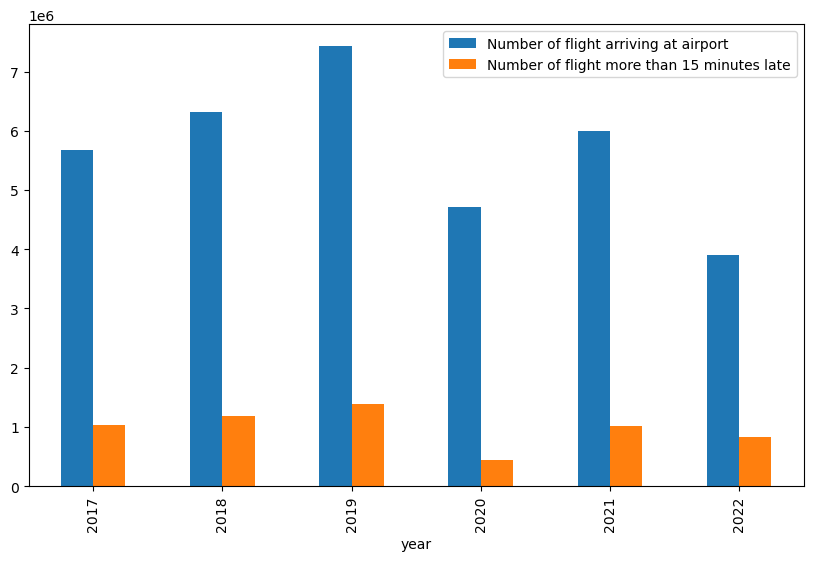

In [8]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late']]
df_grouped = df_sub.groupby('year').sum()
df_grouped.plot(kind='bar', figsize=(10,6))


# Save the plot as a PNG file
plt.savefig('flights delayed vs arrived.png')

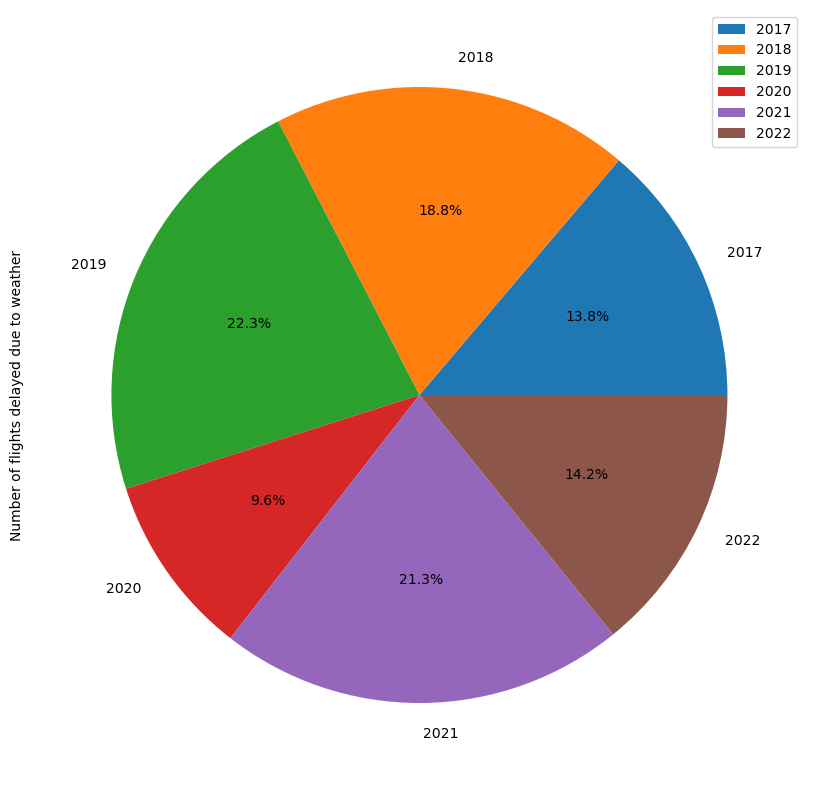

In [9]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flights delayed due to weather']]
df_grouped = df_sub.groupby('year').sum()
#df_grouped.plot(kind='pie', y='Number of flight arriving at airport', figsize=(20,10),  autopct='%1.1f%%')
df_grouped.plot(kind='pie', y='Number of flights delayed due to weather', figsize=(10,10),  autopct='%1.1f%%')


# Save the plot as a PNG file
plt.savefig('Number of flights delayed due to weather.png')

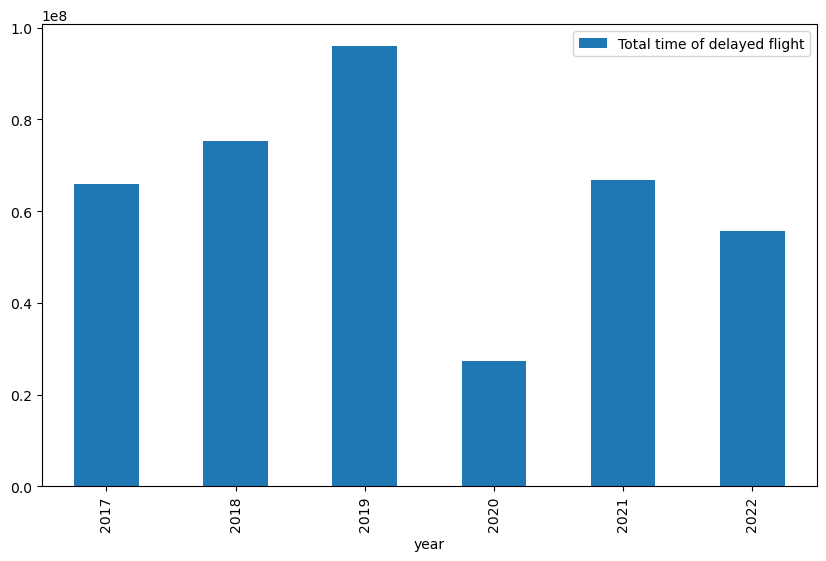

In [10]:
df_sub = df[['year', 'Total time of delayed flight']]
df_grouped = df_sub.groupby('year').sum()
df_grouped.plot(kind='bar', figsize=(10,6))


# Save the plot as a PNG file
plt.savefig('Flight Delays vs year.png')

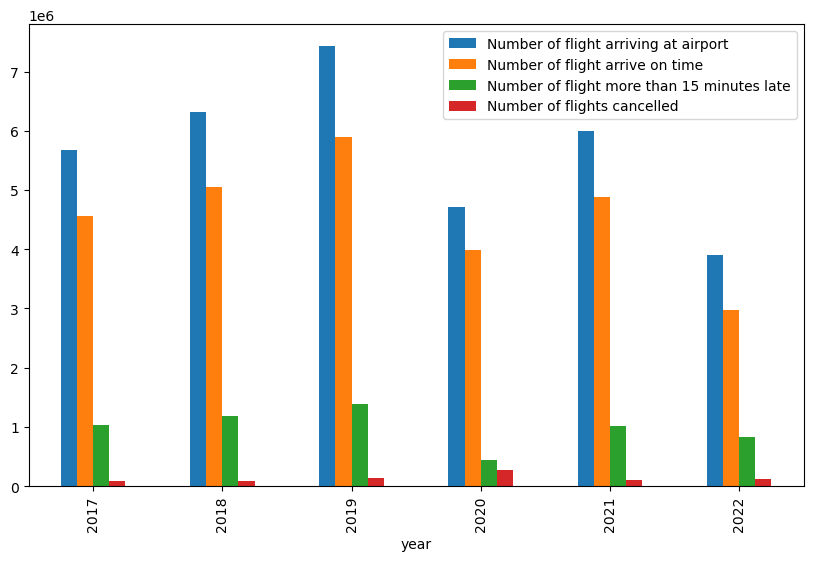

In [11]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight arrive on time', 
             'Number of flight more than 15 minutes late', 
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('year').sum()
df_grouped.plot(kind='bar', figsize=(10,6))


# Save the plot as a PNG file
plt.savefig('Flight Delays vs Arrivals vs cancel.png')

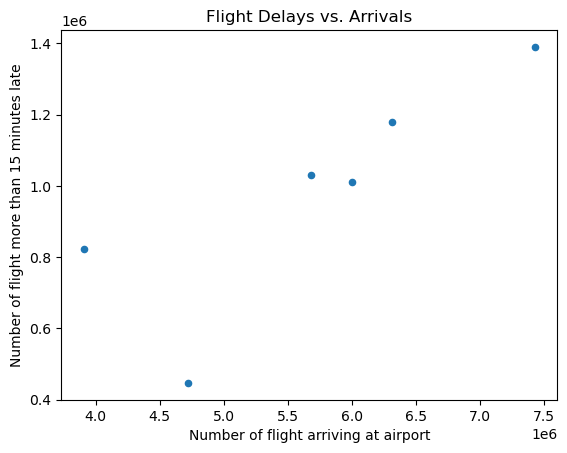

<Figure size 640x480 with 0 Axes>

In [12]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late', 
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('year').sum()

# Scatter plot
ax = df_grouped.plot(kind='scatter', x='Number of flight arriving at airport', y='Number of flight more than 15 minutes late')
                     #s=df_grouped['Number of flights cancelled']*10, figsize=(10, 6))
ax.set_xlabel("Number of flight arriving at airport")
ax.set_ylabel("Number of flight more than 15 minutes late")
ax.set_title("Flight Delays vs. Arrivals")
plt.show()


# Save the plot as a PNG file
plt.savefig('Flight Delays vs. Arrivals.png')

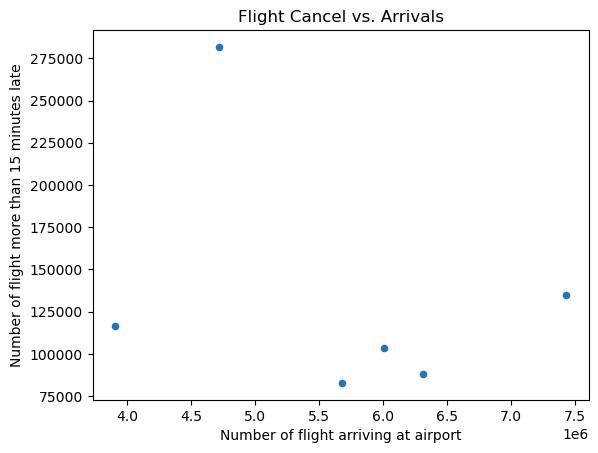

<Figure size 640x480 with 0 Axes>

In [13]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late', 
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('year').sum()

# Scatter plot
ax = df_grouped.plot(kind='scatter', x='Number of flight arriving at airport', y='Number of flights cancelled')
                     #s=df_grouped['Number of flights cancelled']*10, figsize=(10, 6))
ax.set_xlabel("Number of flight arriving at airport")
ax.set_ylabel("Number of flight more than 15 minutes late")
ax.set_title("Flight Cancel vs. Arrivals")
plt.show()


# Save the plot as a PNG file
plt.savefig('Flight Cancel vs. Arrivals in scatter.png')

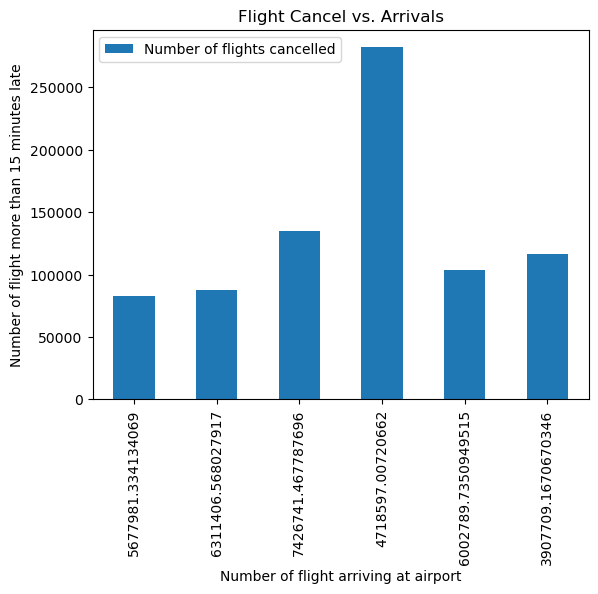

<Figure size 640x480 with 0 Axes>

In [14]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late',
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('year').sum()

# Scatter plot
ax = df_grouped.plot(kind='bar', x='Number of flight arriving at airport', y='Number of flights cancelled')
                     #s=df_grouped['Number of flights cancelled']*10, figsize=(10, 6))
ax.set_xlabel("Number of flight arriving at airport")
ax.set_ylabel("Number of flight more than 15 minutes late")
ax.set_title("Flight Cancel vs. Arrivals")
plt.show()


# Save the plot as a PNG file
plt.savefig('Flight Cancel vs. Arrivals in bar.png')

In [15]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight on time', 'Number of flight more than 15 minutes late', 
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('year').sum()

# Scatter plot
ax = df_grouped.plot(kind='line', x='Number of flight arriving at airport', y='Number of flights cancelled')
                     #s=df_grouped['Number of flights cancelled']*10, figsize=(10, 6))
ax.set_xlabel("Number of flight arriving at airport")
ax.set_ylabel("Number of flight more than 15 minutes late")
ax.set_title("Flight Cancel vs. Arrivals")
plt.show()



# Save the plot as a PNG file
plt.savefig('Flight Cancel vs. Arrivals.png')

KeyError: "['Number of flight on time'] not in index"

In [ ]:
df_sub = df[['year', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late',
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('year').sum()

# Histogram
ax = df_grouped.plot(kind='hist', x='Number of flights cancelled', bins=10, figsize=(10, 6))
ax.set_xlabel("Number of flights cancelled")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Flight Cancellations")
plt.show()



# Save the plot as a PNG file
plt.savefig('Distribution of Flight Cancellations.png')

In [ ]:

# Group the data by year and sum the number of flights arriving at airport for each year
df_grouped = df.groupby('year')['Number of flight arriving at airport'].sum()

# Create a bar plot
ax = df_grouped.plot(kind='bar', figsize=(10,6))
ax.set_xlabel("Year")
ax.set_ylabel("Number of Flights Arriving")
ax.set_title("Number of Flights Arriving at Airport by Year")
plt.show()



# Save the plot as a PNG file
plt.savefig('Number of Flights Arriving at Airport by Year single.png')

In [ ]:

# Group the data by year and sum the number of flights arriving at airport for each year
df_grouped = df.groupby('year')['Number of flight arriving at airport','Number of flight more than 15 minutes late', 
                                'Number of flights delayed due to air carrier', 'Number of flights delayed due to weather', 'Number of flights delayed due to National Aviation System', 'Number of flights delayed due to security', 'Number of flights delayed as a result of another flight on the same aircraft delayed', 'Number of flights cancelled', 'Number of flights that were diverted'].sum()
# Create a bar plot
ax = df_grouped.plot(kind='bar', figsize=(20,15))
ax.set_xlabel("Year")
ax.set_ylabel("Number of Flights Arriving")
ax.set_title("Number of Flights Arriving at Airport by Year")
plt.show()
# Save the plot as a PNG file
plt.savefig('Number of Flights Arriving at Airport by Year in bar.png')

In [ ]:

# Group the data by year and sum the number of flights arriving at airport for each year
df_grouped = df.groupby('year')['Number of flight arriving at airport','Number of flight more than 15 minutes late', 'Number of flights delayed due to air carrier', 'Number of flights delayed due to weather', 'Number of flights delayed due to National Aviation System', 'Number of flights delayed due to security', 'Number of flights delayed as a result of another flight on the same aircraft delayed', 'Number of flights cancelled', 'Number of flights that were diverted'].sum()

# Create a bar plot
ax = df_grouped.plot(kind='line', figsize=(25,10))
ax.set_xlabel("Year")
ax.set_ylabel("Number of Flights Arriving")
ax.set_title("Number of Flights Arriving at Airport by Year")
plt.show()


# Save the plot as a PNG file
plt.savefig('Number of Flights Arriving at Airport by Year.png')

In [ ]:

# Group the data by year and sum the number of flights for each year
df_grouped = df.groupby('year')['Number of flight arriving at airport','Number of flight more than 15 minutes late', 'Number of flights delayed due to air carrier', 'Number of flights delayed due to weather', 'Number of flights delayed due to National Aviation System', 'Number of flights delayed due to security', 'Number of flights delayed as a result of another flight on the same aircraft delayed', 'Number of flights cancelled', 'Number of flights that were diverted'].sum()

# Create a scatter plot for Number of flights arriving at airport vs. Number of flights cancelled
ax = df_grouped.plot(kind='scatter', x='Number of flight arriving at airport', y='Number of flights cancelled', figsize=(10,6))
ax.set_xlabel("Number of Flights Arriving at Airport")
ax.set_ylabel("Number of Cancelled Flights")
ax.set_title("Number of Cancelled Flights vs. Number of Flights Arriving at Airport")
plt.show()


# Save the plot as a PNG file
plt.savefig('Number of Cancelled Flights vs. Number of Flights Arriving at Airport.png')

In [ ]:
df_sub = df[['year', 'Delayed']]
df_delayed = df_sub[df_sub['Delayed'] == 1].groupby('year').count()
df_not_delayed = df_sub[df_sub['Delayed'] == 0].groupby('year').count()

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot delayed flights
df_delayed.plot(kind='pie', y='Delayed', ax=axs[0], autopct='%1.1f%%')
axs[0].set_title('Delayed Flights by Year')

# Plot not delayed flights
df_not_delayed.plot(kind='pie', y='Delayed', ax=axs[1], autopct='%1.1f%%')
axs[1].set_title('Not Delayed Flights by Year')

plt.show()


# Save the plot as a PNG file
plt.savefig('delay_notdelay.png')

In [ ]:
df_sub = df[['carrier_name', 'Number of flight arriving at airport', 'Number of flight arrive on time', 
             'Number of flight more than 15 minutes late', 
             'Number of flights cancelled']]
df_grouped = df_sub.groupby('carrier_name').sum()
df_grouped.plot(kind='bar', figsize=(10,6))


# Save the plot as a PNG file
plt.savefig('Flight Delays vs Arrivals vs cancel.png')

In [ ]:
data = df.to_dict(orient = "records") #converting data into dictionary
db = client.graph_of_flight_delay
db.graph_of_flight_delay.insert_many(data)